# Forest Fires data

In [18]:
# Importing necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
forest_data = pd.read_csv('forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [20]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [21]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [22]:
forest_data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [23]:
forest_data_corr = forest_data.corr()
forest_data_corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


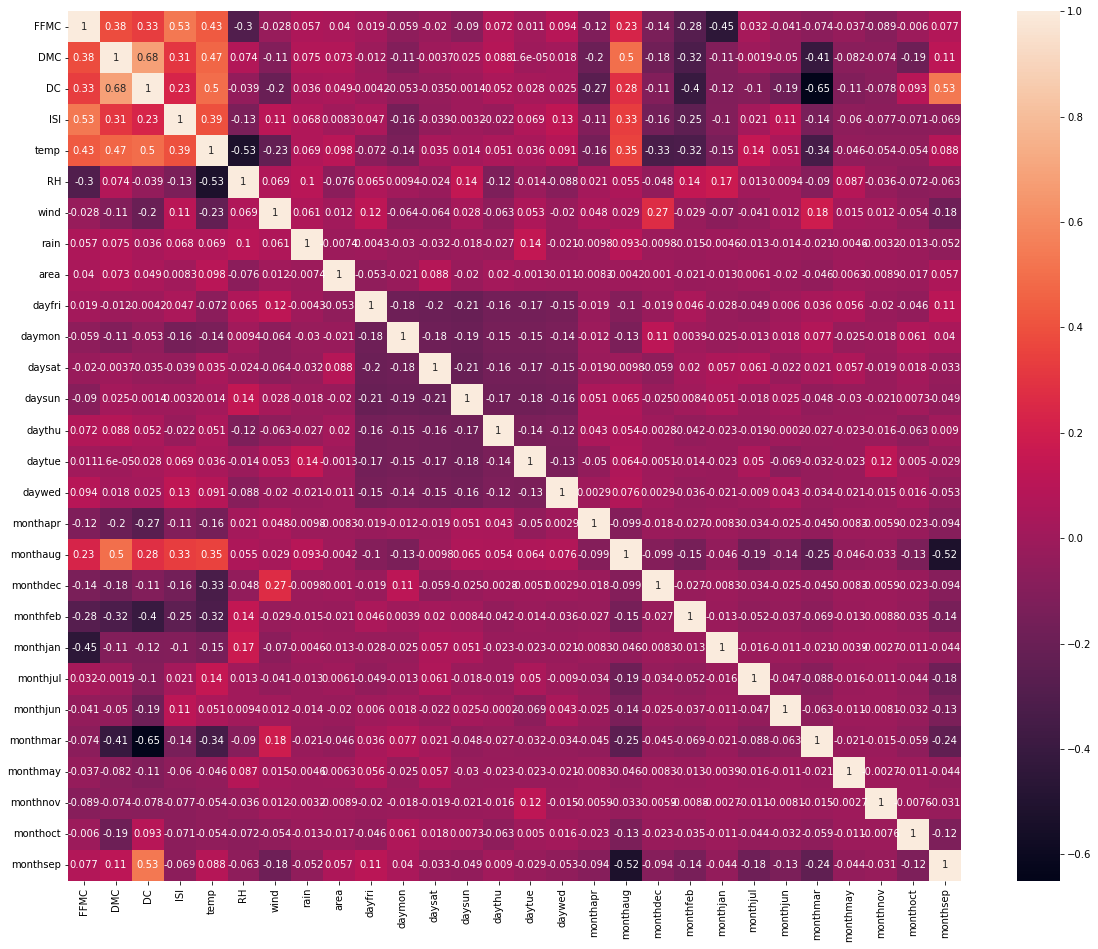

In [24]:
import seaborn as sns
plt.figure(figsize=(20,16))
sns.heatmap(forest_data_corr, annot = True)
None

In [25]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
forest_data['size_category']= label_encoder.fit_transform(forest_data['size_category'])

In [26]:
forest_data=forest_data.drop(columns=['month','day'],axis=1)
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
forest_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [28]:
x = forest_data.iloc[:,0:-1]
y = forest_data['size_category']

In [29]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)


# Artificial neural network model - backpropagation


In [32]:
#create model
model = Sequential()
model.add(Dense(42, input_dim =28, activation = 'relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [33]:
#Complile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [34]:
#Fit the model
history = model.fit(x_train,y_train, validation_split=0.33,epochs=180,batch_size=28)

Epoch 1/180
10/10 [==============================] - 3s 21ms/step - loss: 20.9507 - accuracy: 0.7246 - val_loss: 8.4347 - val_accuracy: 0.7591
Epoch 2/180
10/10 [==============================] - 0s 4ms/step - loss: 6.2697 - accuracy: 0.5290 - val_loss: 7.1415 - val_accuracy: 0.3869
Epoch 3/180
10/10 [==============================] - 0s 4ms/step - loss: 4.3029 - accuracy: 0.6413 - val_loss: 4.3662 - val_accuracy: 0.6934
Epoch 4/180
10/10 [==============================] - 0s 4ms/step - loss: 3.4628 - accuracy: 0.6884 - val_loss: 3.8790 - val_accuracy: 0.5620
Epoch 5/180
10/10 [==============================] - 0s 4ms/step - loss: 2.7508 - accuracy: 0.6304 - val_loss: 2.9123 - val_accuracy: 0.6788
Epoch 6/180
10/10 [==============================] - 0s 4ms/step - loss: 2.3734 - accuracy: 0.6993 - val_loss: 2.4783 - val_accuracy: 0.6715
Epoch 7/180
10/10 [==============================] - 0s 4ms/step - loss: 2.0691 - accuracy: 0.7355 - val_loss: 2.4893 - val_accuracy: 0.6204
Epoch 8/180

Epoch 59/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9746 - val_loss: 0.0943 - val_accuracy: 0.9708
Epoch 60/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9891 - val_loss: 0.0999 - val_accuracy: 0.9489
Epoch 61/180
10/10 [==============================] - 0s 4ms/step - loss: 0.0554 - accuracy: 0.9746 - val_loss: 0.0955 - val_accuracy: 0.9708
Epoch 62/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9783 - val_loss: 0.1038 - val_accuracy: 0.9708
Epoch 63/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.9783 - val_loss: 0.1068 - val_accuracy: 0.9708
Epoch 64/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9819 - val_loss: 0.0896 - val_accuracy: 0.9708
Epoch 65/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9891 - val_loss: 0.0912 - val_accuracy: 0.9562
Epoch 

10/10 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9891 - val_loss: 0.0849 - val_accuracy: 0.9635
Epoch 117/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9819 - val_loss: 0.0734 - val_accuracy: 0.9781
Epoch 118/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9746 - val_loss: 0.0704 - val_accuracy: 0.9854
Epoch 119/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9928 - val_loss: 0.0694 - val_accuracy: 0.9854
Epoch 120/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9928 - val_loss: 0.0696 - val_accuracy: 0.9854
Epoch 121/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9855 - val_loss: 0.0684 - val_accuracy: 0.9708
Epoch 122/180
10/10 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 0.9891 - val_loss: 0.0970 - val_accuracy: 0.9562
Epoch 123/180

10/10 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9710 - val_loss: 0.0773 - val_accuracy: 0.9708
Epoch 174/180
10/10 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.9493 - val_loss: 0.1431 - val_accuracy: 0.9489
Epoch 175/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.9601 - val_loss: 0.3009 - val_accuracy: 0.9270
Epoch 176/180
10/10 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.9493 - val_loss: 0.2064 - val_accuracy: 0.9343
Epoch 177/180
10/10 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.9674 - val_loss: 0.2244 - val_accuracy: 0.9343
Epoch 178/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9710 - val_loss: 0.1615 - val_accuracy: 0.9416
Epoch 179/180
10/10 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9819 - val_loss: 0.2453 - val_accuracy: 0.9270
Epoch 180/180

In [35]:
#evalute the model
score = model.evaluate(x,y)



17/17 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9632


In [36]:
print("%s; %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy; 96.32%


In [37]:
# Visualizing training history
# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

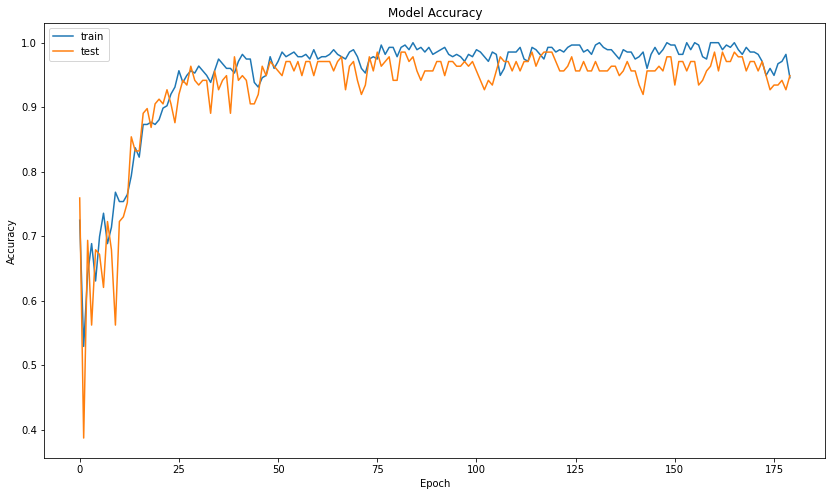

In [38]:
# summarize history for accuracy
from matplotlib import pyplot as plt
plt.figure(figsize=(14,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

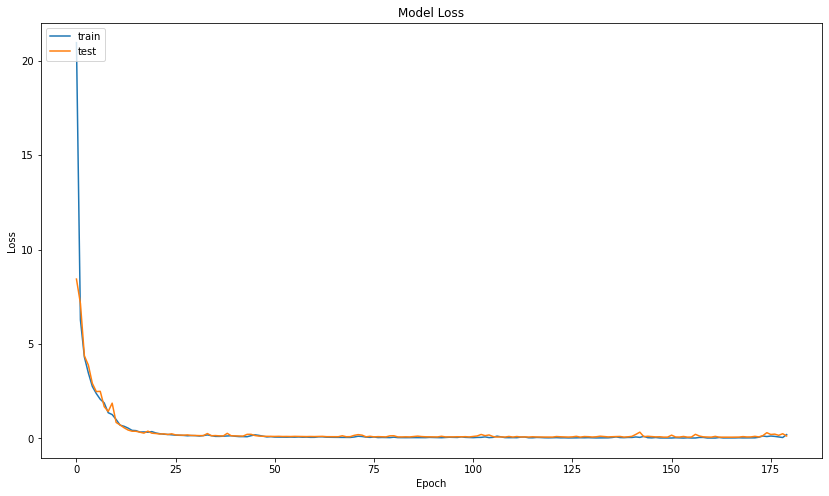

In [39]:

# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# hyper parameter tuning

In [40]:
X =forest_data.iloc[:,0:-1]
Y =forest_data['size_category']

In [41]:
#standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [42]:
pd.DataFrame(X_standardized).describe().T

,count,mean,std,min,25%,50%,75%,max
0,517.0,-1.754024e-15,1.000969,-13.045818,-0.080635,0.173229,0.408960,1.007353
1,517.0,3.070830e-16,1.000969,-1.715608,-0.660665,-0.040203,0.492739,2.819865
2,517.0,7.387171e-17,1.000969,-2.179108,-0.444828,0.469119,0.669663,1.261610
3,517.0,-3.865380e-17,1.000969,-1.980578,-0.553595,-0.136477,0.390409,10.335381
4,517.0,2.005703e-16,1.000969,-2.876943,-0.584238,0.070821,0.674164,2.484195
5,517.0,3.362881e-16,1.000969,-1.796637,-0.692456,-0.140366,0.534411,3.417549
6,517.0,-2.676776e-16,1.000969,-2.021098,-0.736124,-0.009834,0.492982,3.007063
7,517.0,-2.841054e-16,1.000969,-0.073268,-0.073268,-0.073268,-0.073268,21.572284
8,517.0,-1.274502e-16,1.000969,-0.202020,-0.202020,-0.193843,-0.098709,16.951110
9,517.0,4.874674e-17,1.000969,-0.443576,-0.443576,-0.443576,-0.443576,2.254407


# Tuning of hyperparameters - Batch size and Epochs

In [50]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam



In [51]:
# create model
def create_model():
 model = Sequential()
 model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
 model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
 model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

 adam=Adam(lr=0.01)
 model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
 return model


In [52]:
#create the model
model = KerasClassifier(build_fn= create_model,verbose = 0)
#Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of thr grid of the search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid= param_grid, verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   0.6s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.798 total time=   0.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.864 total time=   0.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.835 total time=   0.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.893 total time=   0.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [53]:
# summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
# Summarize the results
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds, params ):
 print('{},{} with: {}'.format(mean,stdev,param))

Best : 0.9148431658744812, using {'batch_size': 10, 'epochs': 50}
0.8780619859695434,0.0686292110272436 with: {'batch_size': 10, 'epochs': 10}
0.9148431658744812,0.043324060124447145 with: {'batch_size': 10, 'epochs': 50}
0.9128640651702881,0.0444936796822815 with: {'batch_size': 10, 'epochs': 100}
0.8606049299240113,0.0736867497362774 with: {'batch_size': 20, 'epochs': 10}
0.9051157712936402,0.050575664999243715 with: {'batch_size': 20, 'epochs': 50}
0.9070761680603028,0.04905727739713657 with: {'batch_size': 20, 'epochs': 100}
0.7791262149810791,0.15272372367697867 with: {'batch_size': 40, 'epochs': 10}
0.9051344275474549,0.05087909787625552 with: {'batch_size': 40, 'epochs': 50}
0.9051904320716858,0.0572709414339666 with: {'batch_size': 40, 'epochs': 100}


# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [54]:
from keras.layers import Dropout
# Defining the model
def create_model(learning_rate,dropout_rate):
 model = Sequential()
 model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
 model.add(Dropout(dropout_rate))
 model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
 model.add(Dropout(dropout_rate))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr = learning_rate)
 model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
 return model
# Create the model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=40, verbose=0)
# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   0.4s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   0.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   0.5s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   0.4s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.699 total time=   0.4s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [57]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.790851378440857, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7907580375671387,0.10971564466589916 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.790851378440857,0.11034972825723437 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7325242757797241,0.15178268966445949 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7598020911216736,0.1371752843293912 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7674197196960449,0.150562550019193 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7384241938591003,0.13977321693801728 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.781067967414856,0.11823552694115971 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer



In [60]:
from keras.layers import Dropout
# Defining the model
def create_model(activation_function,init):
 model = Sequential()
 model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
 model.add(Dropout(0.1))
 model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
 model.add(Dropout(0.1))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr = 0.001)
 model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
 return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs=10)
# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   0.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   0.5s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.476 total time=   0.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   0.6s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   0.5s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.612 total time=   0.6s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.680 total time=   0.4s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.699 total time=   0.5s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.952 total time=   0.5s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.750 total time=   0.4s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.612 total time=   0.5s
[CV 4/5; 11/12] START activation_f

In [61]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.746135 using {'activation_function': 'linear', 'init': 'uniform'}
0.720874 (0.167950) with: {'activation_function': 'softmax', 'init': 'uniform'}
0.730583 (0.154351) with: {'activation_function': 'softmax', 'init': 'normal'}
0.730583 (0.154351) with: {'activation_function': 'softmax', 'init': 'zero'}
0.732524 (0.154002) with: {'activation_function': 'relu', 'init': 'uniform'}
0.730583 (0.154351) with: {'activation_function': 'relu', 'init': 'normal'}
0.730583 (0.154351) with: {'activation_function': 'relu', 'init': 'zero'}
0.728734 (0.129477) with: {'activation_function': 'tanh', 'init': 'uniform'}
0.738368 (0.140227) with: {'activation_function': 'tanh', 'init': 'normal'}
0.730583 (0.154351) with: {'activation_function': 'tanh', 'init': 'zero'}
0.746135 (0.129926) with: {'activation_function': 'linear', 'init': 'uniform'}
0.744268 (0.114176) with: {'activation_function': 'linear', 'init': 'normal'}
0.730583 (0.154351) with: {'activation_function': 'linear', 'init': 'zero'}


# Tuning of Hyperparameter :-Number of Neurons in activation layer


In [62]:
# Defining the model
def create_model(neuron1,neuron2):
 model = Sequential()
 model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation='linear'))
 model.add(Dropout(0.1))
 model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation='linear'))
 model.add(Dropout(0.1))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr = 0.001)
 model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
 return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs=10)
# Define the grid search parameters
neuron1 = [4,8,16]
neuron2 = [2,4,8]
# Make a dictionary of the grid search parameters
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   0.4s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   0.5s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.602 total time=   0.6s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.680 total time=   0.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.718 total time=   0.6s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [63]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.753883 using {'neuron1': 4, 'neuron2': 4}
0.750000 (0.134441) with: {'neuron1': 4, 'neuron2': 2}
0.753883 (0.130325) with: {'neuron1': 4, 'neuron2': 4}
0.746154 (0.129230) with: {'neuron1': 4, 'neuron2': 8}
0.736482 (0.121978) with: {'neuron1': 8, 'neuron2': 2}
0.736501 (0.117278) with: {'neuron1': 8, 'neuron2': 4}
0.742308 (0.119641) with: {'neuron1': 8, 'neuron2': 8}
0.738443 (0.113278) with: {'neuron1': 16, 'neuron2': 2}
0.746210 (0.109583) with: {'neuron1': 16, 'neuron2': 4}
0.748152 (0.107593) with: {'neuron1': 16, 'neuron2': 8}


# Training model with optimum values of Hyperparameters

In [64]:
from sklearn.metrics import classification_report, accuracy_score
# Defining the model
def create_model():
 model = Sequential()
 model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation ='relu'))
 model.add(Dropout(0.1))
 model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation ='relu'))
 model.add(Dropout(0.1))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay
 model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
 return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs=10)
# Fitting the model
model.fit(X_standardized,Y)
# Predicting using trained model
y_predict = model.predict(X_standardized)
# Printing the metrics
print(accuracy_score(Y,y_predict))

17/17 [==============================] - 0s 1ms/step
0.7311411992263056


# Hyperparameters all at once

The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We
may have missed the best values. The performance can be further improved by finding the
optimum values of hyperparameters all at once given by the code snippet below.*


In [68]:

def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
 model = Sequential()
 model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation =activation_function))
 model.add(Dropout(dropout_rate))
 model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
 model.add(Dropout(dropout_rate))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr = learning_rate)
 model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
 return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]
# Make a dictionary of the grid search parameters
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
 activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [52]:
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   0.9s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   0.9s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, lear

[CV 5/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   0.8s
[CV 1/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   0.8s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   1.0s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuro

[CV 5/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.854 total time=   0.8s
[CV 1/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   0.8s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.837 total time=   0.8s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuro

[CV 5/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.903 total time=   0.8s
[CV 1/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.962 total time=   0.8s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.798 total time=   0.8s
[CV 3/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, 

[CV 5/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.748 total time=   0.8s
[CV 1/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=   0.8s
[CV 2/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.779 total time=   0.7s
[CV 3/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[

[CV 5/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.757 total time=   0.8s
[CV 1/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.971 total time=   1.0s
[CV 2/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.760 total time=   0.8s
[CV 3/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuro

[CV 5/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   0.8s
[CV 1/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   0.8s
[CV 2/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   0.8s
[CV 3/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuro

[CV 5/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   1.5s
[CV 1/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   1.8s
[CV 2/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   1.4s
[CV 3/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16,

[CV 5/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.874 total time=   0.8s
[CV 1/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.962 total time=   0.8s
[CV 2/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.817 total time=   1.0s
[CV 3/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 5/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.816 total time=   1.1s
[CV 1/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.981 total time=   0.9s
[CV 2/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.750 total time=   0.9s
[CV 3/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3

[CV 5/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.767 total time=   0.8s
[CV 1/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.952 total time=   0.7s
[CV 2/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.740 total time=   0.7s
[CV 3/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5

[CV 5/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   0.8s
[CV 1/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   0.8s
[CV 2/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   0.8s
[CV 3/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5

KeyboardInterrupt: 

# 2.

# Gas Turbine data

In [69]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import tensorflow
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split , cross_val_score
#Create your first NLP in keras
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

In [70]:
data = pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [71]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [73]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [74]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [75]:
#changing position of target column 'TEY'
Target = data['TEY']
#Drop the existing column
data.drop(labels=['TEY'], axis=1, inplace = True)
data.insert(0, 'Y' , Target)

data = data.rename({'Y':'TEY'}, axis = 1)

data.head(10)

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
5,114.72,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,10.626,3.4467,82.409
6,114.71,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,10.644,3.4874,82.440
7,114.71,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,10.656,3.6043,83.010
8,114.72,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,10.644,3.3943,82.284
9,131.70,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,11.679,1.9081,82.782


In [76]:
data.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


#  feature selection

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [78]:
x = data.iloc[:,1:]
y = data.iloc[:, 0 ]

In [79]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [80]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [81]:
#Feature selection
def select_feature(x_train, y_train,x_test):
    #configure to selet all features
    fs = SelectKBest(score_func = mutual_info_regression,k = 'all')
    #Learn relationship from training data
    fs.fit(x_train,y_train)
    #transform train input data
    x_train_fs = fs.transform(x_train)
    #tranform test input data
    x_test_fs = fs.transform(x_test)
    return x_train_fs,x_test_fs, fs

In [82]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
#feature selection
x_train_fs, x_test_fs, fs = select_feature(x_train, y_train, x_test)

Feature 0: 0.403249
Feature 1: 0.146841
Feature 2: 0.091390
Feature 3: 0.656735
Feature 4: 1.590229
Feature 5: 1.304503
Feature 6: 0.912300
Feature 7: 1.709719
Feature 8: 0.506520
Feature 9: 0.303095


<BarContainer object of 10 artists>

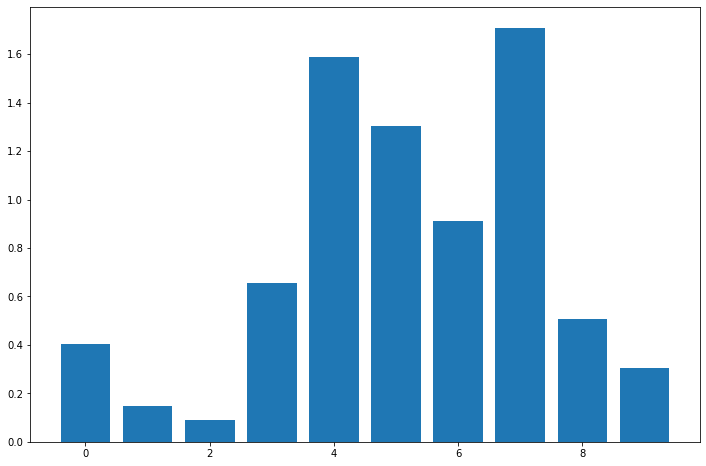

In [83]:
#What are the scores for the feature 
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
#plot the scores
fig, ax = plt.subplots(figsize= (12,8))
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)

# Model Building

In [84]:
x = data.drop(['TEY', 'AT', 'AP','AH', 'CO', 'NOX'], axis=1)
y = data.iloc[:,0]

In [85]:
x

,AFDP,GTEP,TIT,TAT,CDP
0,3.5000,19.663,1059.2,550.00,10.605
1,3.4998,19.728,1059.3,550.00,10.598
2,3.4824,19.779,1059.4,549.87,10.601
3,3.4805,19.792,1059.6,549.99,10.606
4,3.4976,19.765,1059.7,549.98,10.612
...,...,...,...,...,...
15034,3.5421,19.164,1049.7,546.21,10.400
15035,3.5059,19.414,1046.3,543.22,10.433
15036,3.4770,19.530,1037.7,537.32,10.483
15037,3.4486,19.377,1043.2,541.24,10.533


In [86]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

# Neural network model - backpropogation

In [88]:
from keras.models import Sequential 
from keras.layers import Dense

In [89]:
#Create model
model = Sequential()
model.add(Dense(10, input_dim=5,activation='relu', input_shape=(5,)))
model.add(Dense(6, activation= 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [90]:
#Compile model
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mse'])

In [91]:
#fit the model
history = model.fit(x, y, validation_split=0.33,epochs=100, batch_size=40)

Epoch 1/100
252/252 [==============================] - 1s 1ms/step - loss: 18559.6074 - mse: 18559.6074 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 2/100
252/252 [==============================] - 0s 1ms/step - loss: 18559.6035 - mse: 18559.6035 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 3/100
252/252 [==============================] - 0s 1ms/step - loss: 18559.6094 - mse: 18559.6094 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 4/100
252/252 [==============================] - 0s 1ms/step - loss: 18559.5996 - mse: 18559.6016 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 5/100
252/252 [==============================] - 0s 1ms/step - loss: 18559.6113 - mse: 18559.6113 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 6/100
252/252 [==============================] - 0s 1ms/step - loss: 18559.6055 - mse: 18559.6055 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 7/100
252/252 [==============================] - 0s 1ms/step - loss: 18559.6035 - mse: 18559.6035 - 

252/252 [==============================] - 0s 1ms/step - loss: 18559.6035 - mse: 18559.5996 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 56/100
252/252 [==============================] - 0s 1ms/step - loss: 18559.6055 - mse: 18559.6055 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 57/100
252/252 [==============================] - 0s 1ms/step - loss: 18559.6055 - mse: 18559.6055 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 58/100
252/252 [==============================] - 0s 2ms/step - loss: 18559.6055 - mse: 18559.6055 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 59/100
252/252 [==============================] - 0s 2ms/step - loss: 18559.6016 - mse: 18559.6016 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 60/100
252/252 [==============================] - 0s 1ms/step - loss: 18559.6035 - mse: 18559.6035 - val_loss: 17642.9688 - val_mse: 17642.9688
Epoch 61/100
252/252 [==============================] - 0s 1ms/step - loss: 18559.6074 - mse: 18559.6074 - val_lo

In [92]:
print(x_test_fs.shape)

(4963, 10)


In [93]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 627us/step - loss: 18257.1094 - mse: 18257.1094
mse: 1825710.94%


# Hyper parameter tuning


In [94]:
X = data.drop(['TEY','AT', 'AP','AH','CO','NOX'], axis= 1)
Y =data.iloc[:,0]

In [95]:
x

,AFDP,GTEP,TIT,TAT,CDP
0,3.5000,19.663,1059.2,550.00,10.605
1,3.4998,19.728,1059.3,550.00,10.598
2,3.4824,19.779,1059.4,549.87,10.601
3,3.4805,19.792,1059.6,549.99,10.606
4,3.4976,19.765,1059.7,549.98,10.612
...,...,...,...,...,...
15034,3.5421,19.164,1049.7,546.21,10.400
15035,3.5059,19.414,1046.3,543.22,10.433
15036,3.4770,19.530,1037.7,537.32,10.483
15037,3.4486,19.377,1043.2,541.24,10.533


In [96]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [97]:
# Standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [98]:
pd.DataFrame(X_standardized).describe().T

,count,mean,std,min,25%,50%,75%,max
0,15039.0,3.810001e-16,1.000033,-2.779497,-0.626693,-0.018541,0.461220,4.486233
1,15039.0,1.107344e-16,1.000033,-1.806771,-0.509146,-0.080757,0.422864,2.871006
2,15039.0,-2.324212e-15,1.000033,-5.021933,-0.254051,0.296554,0.738249,1.028678
3,15039.0,1.744899e-15,1.000033,-4.188141,-0.410115,0.571257,0.592868,0.662784
4,15039.0,3.640356e-16,1.000033,-1.992416,-0.435434,-0.070119,0.431168,2.700105


# Tuning of all hyperparameters

In [99]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [100]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
 model = Sequential()
 model.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
 model.add(Dropout(dropout_rate))
 model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
 model.add(Dropout(dropout_rate))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr =learning_rate)
 model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
 return model

#Create the model
model= KerasClassifier(build_fn= create_model, verbose =0)

#Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu', 'tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
 activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [101]:
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   8.3s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=   7.9s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning

[CV 5/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   7.9s
[CV 1/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=   8.0s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=nan total time=  10.0s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[

[CV 5/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=nan total time=   8.4s
[CV 1/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   8.2s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=nan total time=   8.2s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[

[CV 5/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=nan total time=   8.6s
[CV 1/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=nan total time=  10.7s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\lavanya\\anaconda\\anaconda1\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.46.3-cp39-cp39-win_amd64.whl (3.5 MB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth-2.6.6-py2.py3-none-any.whl (156

KeyboardInterrupt: 